# Water Quality Prediction Model - Optimized ML Pipeline

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

2. Load Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving PB_All_2000_2021.csv to PB_All_2000_2021.csv


In [4]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


3. Convert 'date' column to datetime and extract year, month.

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

4. Sort by id and date for time consistency

In [6]:
df = df.sort_values(by=['id', 'date'])

5. Drop Missing values for simplicity (can be replaced with imputation)

In [7]:
df = df.dropna()

6. Define Features (X) and Targets (Y)

In [8]:
target_columns = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
feature_columns = ['id', 'year', 'month'] # extendable

X = df[feature_columns]
Y = df[target_columns]

7. Split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

8. Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

9. Model Training: MultiOutput + Random Forest

In [11]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

10. Prediction

In [12]:
y_pred = model.predict(X_test_scaled)

11. Evaluation Metrics

In [13]:
print("\n===== Model Evaluation Results =====")
for i, column in enumerate(Y.columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f"{column:10s} | R2 Score: {r2:.3f} | MSE: {mse:.3f}")


===== Model Evaluation Results =====
NH4        | R2 Score: 0.815 | MSE: 0.744
BSK5       | R2 Score: 0.443 | MSE: 3.655
Suspended  | R2 Score: -0.746 | MSE: 215.585
O2         | R2 Score: 0.416 | MSE: 8.615
NO3        | R2 Score: 0.672 | MSE: 12.989
NO2        | R2 Score: -11.278 | MSE: 2.145
SO4        | R2 Score: -0.206 | MSE: 4974.588
PO4        | R2 Score: 0.610 | MSE: 0.169
CL         | R2 Score: 0.860 | MSE: 18546.447


12. Visualization: Actual vs Predicted

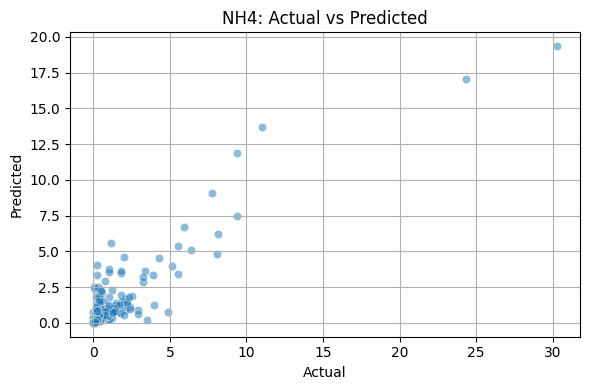

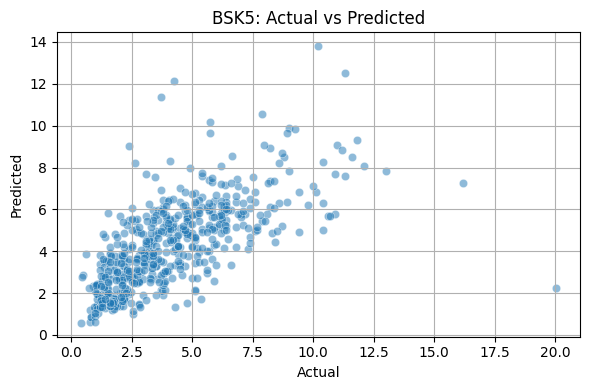

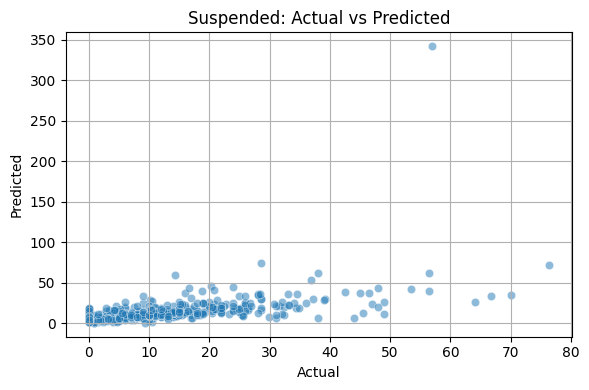

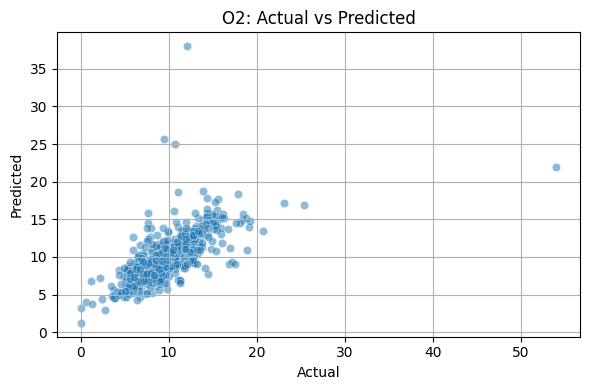

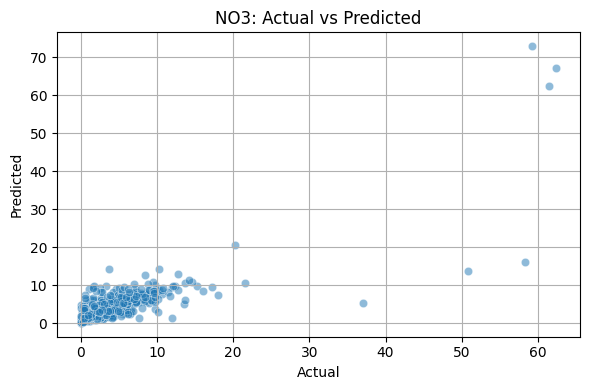

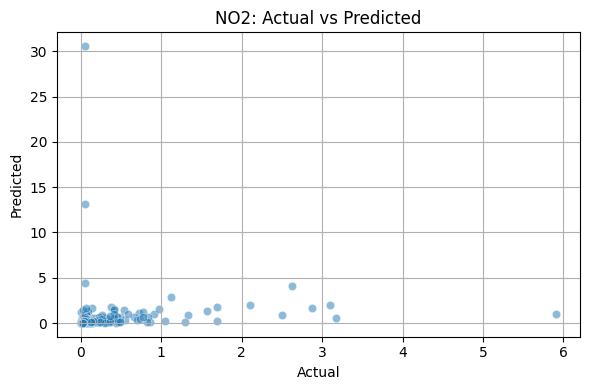

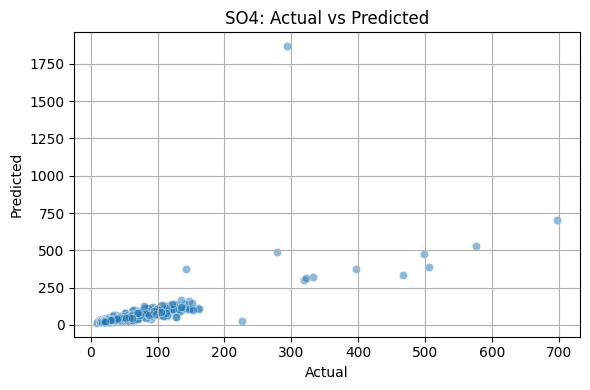

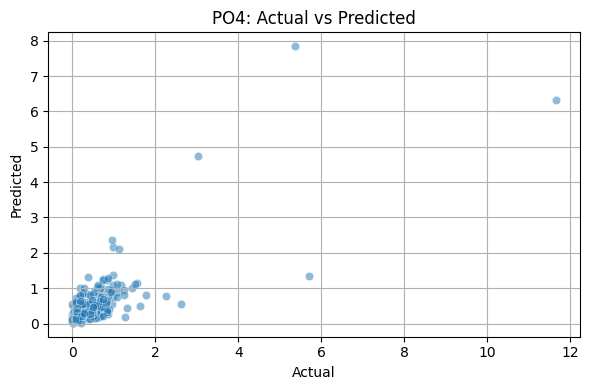

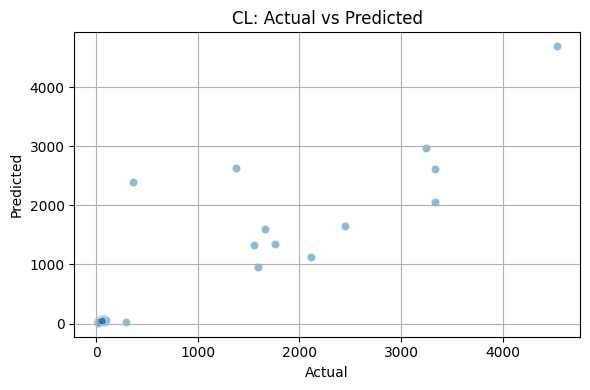

In [14]:
for i, col in enumerate(Y.columns):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test.iloc[:, i], y=y_pred[:, i], alpha=0.5)
    plt.title(f"{col}: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()